# Ejercicios de Interpolación

## Ejercicio 1:

Considere una serie de puntos: $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$ y queremos encontrar el polinomio de mayor grado pase por todos ellos. Sea el conjunto de puntos:
    
$$C=\{(2,2),(3,6),(4,5),(5,5),(6,6)\}$$

- Cual sería el polinomio de mayor grado capaz de pasar por todos ellos.
- Cree un código que muestre el polinomio de mayor grado y grafíquelo (`puede usar Sympy`).
- Compare su resultado con np.polyfit.

## Ejercicio 2:

Sea la función analítica:
    
$$f(x)=\frac{1}{1+x^2}$$

- Genere un juego de nodos (datos) en el intervalo $[-5, 5]$, equiespaciados y grafiquelo.
- Analizando la figura, ¿qué método de interpolación usarías polinomial (Lagrange, Newton) o de trazados (lineal, splines)? 
- Programe un método de cada clase y grafíquelo.
- ¿Qué metodo de interpolación sería el correcto a usar? Justifique su resultado graficándolo.

## Ejercicio 3:

Usualmente para simular la disminución de la temperatura (respecto a la distancia de la fuente) en un proceso termodinámico, 
<center><img src="capturas/imagen0_E.png"></center>
    
se puede usar un polinomio para aproximar en el intervalo $[0,4]$ metros la función $T$ con regla de correspondencia:
    
$$f=e^{0.5 x}$$

Para construir el mencionado polinomio, considere la tabla:

| x | 0 | 1 | 2 | 3| 4|
| :- | -: | :-: | :- | -: | -: |
f(x)| 	f(0)| 	f(1)| 	f(2)| 	f(3)| 	f(4)


- Aplique interpolación polinomial y aproxime el valor de $f(2.4)$ usando un polinomio de **grado 2**.
- Aplique interpolación polinomial y aproxime el valor de $f(2.4)$ usando un polinomio de **mayor grado posible**.
- Encuentre una cota superior para el error absoluto y relativo de interpolación en la aproximación de $f(1.7)$ para cada caso.

## Ejercicio 4

Considere la función:

$$f(x)=\sin(\pi x)$$

genere un conjunto de $3$ a $5$ nodos en el intervalo $[0, \pi/2]$.

- ¿Qué método de interpolación usaría?
- Realice la interpolación mediante el método escogido. 
- Integre la función interpolada en el intervalo $[0, \pi/2]$ usando alguno de los métodos numéricos conocidos.
- Estime el error para cada uno de los incisos anteriores.
- ¿Qué ventaja se tendría si el intervalo es $[0, 2\pi]$?
- Compare ambas implementaciones.

## Ejercicio 5

Considere la función:
$$ f(x) = \sin(x)+x^2 $$

Genere entre $3-6$ nodos en el intervalo $[-1, -1/5]$.

- ¿Qué método de interpolación usaría?
- Realice la interpolación mediante el método escogido. 
- Encuentre numéricamente la raíz que se encuentra en dicho intervalo, para ello use alguno de los métodos conocidos. Notar que ha de usar la función interpolada.

# Posibles respuestas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


from IPython.display import Image

# interpolación polinomial
from scipy.interpolate import interp1d
from scipy.interpolate import lagrange

# interpolación a trazos
from scipy.interpolate import CubicSpline
from scipy.interpolate import InterpolatedUnivariateSpline  # es lo mismo q la de arriba

    1- Tenemos una serie de puntos: (x_0, y_0),(x_1, y_1),...,(x_n, y_n) y queremos encontrar el polinomio de mayor grado pase por todos ellos. Sea el conjunto de puntos:
    
$$C={(2,2),(3,6),(4,5),(5,5),(6,6)}$$
    
    Cree un código que muestre el polinomio de mayor grado y grafíquelo. Compare su resultado con np.polyfit.

In [2]:
# data

x1 = np.array([2, 3, 4, 5, 6])
y1 = np.array([2, 6, 5, 5, 5])

Como tenemos 5 datos, el polinomio será de grado 4
$$p_4 = a_0 + a_1 x +a_2 x^2 + a_3 x^3 + a_4 x^4$$

Para calcular los coeficientes del polinomio podemos usar **Lagrange Polynomial interpolación** o **Interpolación polinomial de Newton**.

Implementemos ambos

### Interpolación de Lagrange


$$
P_i(x) = \prod_{j = 1, j\ne i}^n\frac{x - x_j}{x_i - x_j},
$$

y

$$
L(x) = \sum_{i = 1}^n y_i P_i(x).
$$

Para construir las expresiones de cada término se usa la forma simbólica con `Sympy`. En cada término $P_i(x)$ se usan todos los elementos $i$, excepto el mismo elemento $i$, en el numerador y denominador de la expresión.

En polinomio se agrupan todos los términos multiplicados por su respectivo valor $f(x_i)=y_i$.

In [3]:
import sympy as sym

In [4]:
# Interpolacion de Lagrange

# PROCEDIMIENTO
# Polinomio de Lagrange

def Lagrang(data_x, data_y):
    """
    falta añadir que no existan numeros de x repetidos y orden ascendente
    """
    n = len(data_x)  # longitud de los datos
    
    x = sym.Symbol('x')  # creando objeto de sympy que me ''crea'' la variable x

    polinomio = 0
    #divisorL = np.zeros(n, dtype = float)  # almacenando las diferencias

    for i in range(n):
        # Termino de Lagrange
        numerador = 1
        denominador = 1
        for j in range(n):
            if (j != i):
                numerador *= (x-data_x[j])
                denominador *= (data_x[i]-data_x[j])
    
        terminoLi = numerador/denominador

        polinomio += terminoLi*data_y[i]  # construyendo el polinomio
        #divisorL[i] = denominador

    # simplifica el polinomio
    polisimple = polinomio.expand().evalf()

    # para evaluación numérica
    px = sym.lambdify(x, polisimple)
    
    return px, polisimple

In [5]:
px, polisimple = Lagrang(x1, y1)

print(polisimple)

-0.291666666666667*x**4 + 5.08333333333333*x**3 - 32.2083333333333*x**2 + 87.4166666666667*x - 80.0


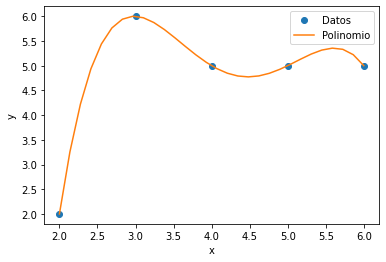

In [6]:
xi = np.linspace(2, 6, 30)

# Gráfica
plt.plot(x1,y1,'o', label = 'Datos')
plt.plot(xi, px(xi), label = 'Polinomio')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Diferencias divididas de Newton

El método se usa en el caso que los puntos en el **eje x** se encuentran espaciados de forma arbitraria y provienen de una función desconocida pero supuestamente diferenciable.

$$
\begin{array}{cccccc}
y_0 & f[x_1,x_0] & f[x_2, x_1,x_0] & f[x_3, x_2, x_1,x_0] & f[x_4, x_3, x_2, x_1,x_0]\\
y_1 & f[x_2,x_1] & f[x_3, x_2,x_1] & f[x_4, x_3, x_2, x_1] & 0\\
y_2 & f[x_3,x_2] & f[x_4, x_3,x_2] & 0          & 0 \\
y_3 & f[x_4,x_3] & 0 & 0 & 0            \\
y_4 & 0 & 0 & 0  & 0  
\end{array}
$$

Tenga en cuenta que la primera fila de la matriz son en realidad todos los coeficientes que necesitamos, es decir, $ a_0, a_1, a_2, a_3, a_4 $.

In [7]:
def divided_diff(x, y):
    '''
    función para calcular el termino dividido
     tabla de diferencias
    '''
    
    n = len(y)
    coef = np.zeros([n, n])  # construyendo la matriz
    
    # Definiendo la primera columna como los valores de y
    coef[:,0] = y
    
    # j es columna, i es filas
    for j in range(1, n):  # empieza en uno pq y es la columna cero
        for i in range(n-j):  # hace que sea triangular la matriz
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1])/(x[i+j]-x[i])
            
    return coef

def newton_poly(data_x, data_y, x_new):
    '''
    evaluar el polinomio de newton
     en x 
    '''
    
    # calculando coeficientes
    coef = divided_diff(data_x, data_y)[0, :]

    n = len(data_x) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x_new - data_x[n-k])*p
        
    return p

In [8]:
xi = np.linspace(2, 6, 30)

y_new = newton_poly(x1, y1, xi)

In [11]:
?interp1d

[ -0.29166667   5.08333333 -32.20833333  87.41666667 -80.        ]
-0.291666666666667*x**4 + 5.08333333333333*x**3 - 32.2083333333333*x**2 + 87.4166666666667*x - 80.0


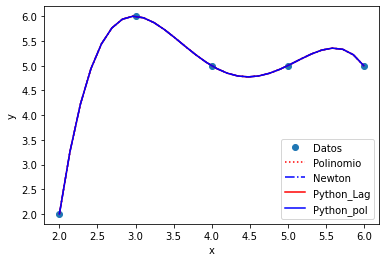

In [9]:
f = lagrange(x1, y1)
coef = np.polyfit(x1, y1, deg=4)
f2 = np.poly1d(coef)

print(coef)
print(polisimple)

# Gráfica
plt.plot(x1,y1,'o', label = 'Datos')
plt.plot(xi, px(xi), 'r:', label = 'Polinomio')
plt.plot(xi, y_new, 'b-.', label = 'Newton')

plt.plot(xi, f(xi), 'r-', label = 'Python_Lag')
plt.plot(xi, f2(xi), 'b-', label = 'Python_pol')


plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

 2- A continuación se tiene una función analítica
    
$$f(x)=\frac{1}{1+x^2}$$

a) Genere un juego de datos (nodos) en el intervalo $[-5, 5]$, equiespaciados por uno y grafiquelo.

b) ¿Mirando la figura, que método de interpolación usarías polinomial (Lagrange, Newton) o de trazados (lineal, splines)? Hagalo y grafiquelo.

c) ¿Qué metodo de interpolación sería el correcto a usar? Hagalo y grafiquelo con el anterior.

In [73]:
f_2 = lambda x: 1/(1+x**2)  # Función de Runge

x2 = np.linspace(-5, 5, 11)
y2 = f_2(x2)

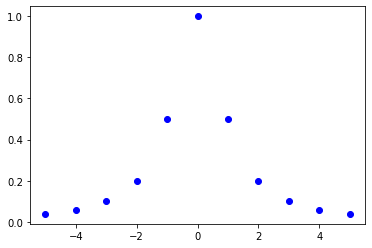

In [74]:
plt.plot(x2, y2, 'bo')

coeficientes
[-2.26244344e-05 -2.95736221e-19  1.26696833e-03  8.42998787e-19
 -2.44117647e-02  2.01271248e-16  1.97375566e-01 -2.72984972e-15
 -6.74208145e-01  6.69113248e-15  1.00000000e+00]
-2.26244343891403e-5*x**10 + 0.00126696832579185*x**8 - 0.0244117647058824*x**6 + 0.19737556561086*x**4 - 0.67420814479638*x**2 + 1.0


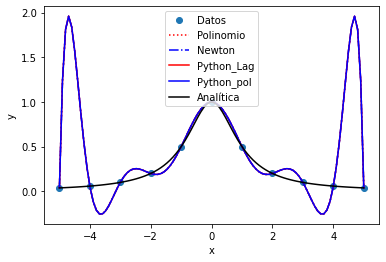

In [78]:
# intentemos interpolar con el código de Lagrange y polyfit

xi = np.linspace(-5, 5, 100)

y_new = newton_poly(x2, y2, xi)

n = len(x2)-1

px, polisimple = Lagrang(x2, y2)

f = lagrange(x2, y2)
coef = np.polyfit(x2, y2, deg=n)
f2 = np.poly1d(coef)

print('coeficientes')
print(coef)
print(polisimple)

# Gráfica
plt.plot(x2,y2,'o', label = 'Datos')
plt.plot(xi, px(xi), 'r:', label = 'Polinomio')
plt.plot(xi, y_new, 'b-.', label = 'Newton')

plt.plot(xi, f(xi), 'r-', label = 'Python_Lag')
plt.plot(xi, f2(xi), 'b-', label = 'Python_pol')


plt.plot(xi, f_2(xi), 'k-', label = 'Analítica')


plt.legend(loc='upper center')
plt.xlabel('x')
plt.ylabel('y')
plt.show()



In [ ]:
# notar que las interpolaciones polínomicas, es decir las que ajustan un polinomio 
# de grado n-1 para que pase por todos los datos no da una interpolación correcta
# intentemoslo ahora con los trazados, es decir los que toman dos (lineal), tres datos (spliter)

In [ ]:
# acá va código de interpolación lineal

In [79]:
# Frontera sujeta:
# Condición: S'(x_0) = f'(x_0) y  S'(x_n) = f'(x_n)

# Trazador cúbico natural
# Condición: S''(x_0) = S''(x_n) = 0

def traza3natural(xi,yi):
    """
    verificar que datos ...
    """
    n = len(xi)
    
    # Valores h_j = x_(j+1)-x_j
    
    h = np.zeros(n-1, dtype = float)  # almacena la diferencia entre valores de x alternos
    for j in range(n-1):  # n-1, pq el final no se resta
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1, n-3):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)
    
    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)

In [88]:
# PROCEDIMIENTO
# Tabla de polinomios por tramos
n = len(x2)
px_tabla = traza3natural(x2,y2)

# SALIDA
print('Polinomios por tramos: ')
for tramo in range(1,n):
    print(' x = ['+ str(x2[tramo-1]) +','+str(x2[tramo])+']')
    print(str(px_tabla[tramo-1]))

Polinomios por tramos: 
 x = [-5.0,-4.0]
0.00273368165795855*x**3 + 0.0410052248693783*x**2 + 0.222654433639159*x + 0.468313292167696
 x = [-4.0,-3.0]
0.00714607134821629*x**3 + 0.0939539011524712*x**2 + 0.434449138771531*x + 0.750706232344191
 x = [-3.0,-2.0]
0.00669108272293193*x**3 + 0.0898590035249119*x**2 + 0.422164445888853*x + 0.738421539461513
 x = [-2.0,-1.0]
0.107266068348291*x**3 + 0.693308917277068*x**2 + 1.62906427339317*x + 1.54302142446439
 x = [-1.0,0.0]
-0.435755356116097*x**3 - 0.935755356116097*x**2 + 1.0
 x = [0.0,1.0]
0.435755356116097*x**3 - 0.935755356116097*x**2 + 1.0
 x = [1.0,2.0]
-0.107266068348291*x**3 + 0.693308917277068*x**2 - 1.62906427339317*x + 1.54302142446439
 x = [2.0,3.0]
-0.00669108272293192*x**3 + 0.0898590035249118*x**2 - 0.422164445888853*x + 0.738421539461513
 x = [3.0,4.0]
-0.00714607134821629*x**3 + 0.0939539011524711*x**2 - 0.434449138771531*x + 0.750706232344191
 x = [4.0,5.0]
-0.00273368165795855*x**3 + 0.0410052248693783*x**2 - 0.22265443

In [103]:
f = CubicSpline(x2, y2, bc_type='natural')
f2 = interp1d(x2, y2, kind='cubic')
f3 = InterpolatedUnivariateSpline(x2, y2,k=3)

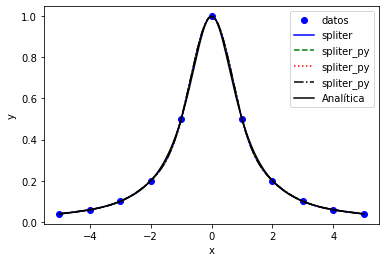

In [105]:
n = len(x2)

xcomp = np.array([])
ycomp = np.array([])
tramo = 1
while not(tramo >= n):
    a = x2[tramo-1]
    b = x2[tramo]
    xtramo = np.linspace(a,b,20)
    
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)

    # vectores de trazador en x,y
    xcomp = np.concatenate((xcomp, xtramo))
    ycomp = np.concatenate((ycomp, ytramo))
    tramo = tramo + 1

# Gráfica
plt.plot(x2,y2, 'bo', label='datos')
plt.plot(xcomp, ycomp, label='spliter', color='blue')
plt.plot(xcomp, f(xcomp), label='spliter_py', color='g', ls='--')
plt.plot(xcomp, f2(xcomp), label='spliter_py', color='r', ls=':')
plt.plot(xcomp, f3(xcomp), label='spliter_py', color='k', ls='-.')

plt.plot(xcomp, f_2(xcomp), 'k-', label = 'Analítica')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
# finalmente, este tipo de interpolación es mejor hacerla por trazos

    3- Para simular la disminución de la temperatura (respecto a la distancia de la fuente) en un proceso termodinámico, 

<img src="imagen0.png">
    
se puede usar un polinomio para aproximar en el intervalo $[0,4]$ metros la función $T$ con regla de correspondencia:
    
$$f=e^{0.5 x}$$

    Para construir el mencionado polinomio, considere la tabla:

| x | 0 | 1 | 2 | 3| 4|
| :- | -: | :-: | :- | -: | -: |
f(x)| 	f(0)| 	f(1)| 	f(2)| 	f(3)| 	f(4)


a) Aplique interpolación polinomial y aproxime el valor de $f(2.4)$ usando un polinomio de **grado 2**.

b) Aplique interpolación polinomial y aproxime el valor de $f(2.4)$ usando un polinomio de **mayor grado posible**.

c) Encuentre una cota superior para el error absoluto y relativo de interpolación en la aproximación de $f(1.7)$ para cada caso.


In [ ]:
# como es polinomial, debe construirse un polinomio que pase por ''todos'' los datos, 
# en este caso como se pide de grado dos, solo se pueden tomar 3 datos

    4- Construya un polinomio que aproxime a

$$f(x)=\sin(\pi x)$$

usando los puntos $x=0, \pi/4, \pi/2$ y aproxime la integral de $0$ a $\pi/2$.

a) Realice la interpolación mediante el método de trazador cúbico (splines).

b) Integre usando alguno de los métodos numéricos conocidos.

c) Estime el error para el ejercicio.



In [ ]:
# el detalle es q para integrar hay que darle la función lambda

    5- Un estanque se drena a través de un tubo como se observa en la figura. 

<img src="imagen.png">

    Con suposiciones simplificadoras, la ecuación diferencial siguiente describe cómo cambia la profundidad con el tiempo:
    
$$\frac{dh}{dt}=-\frac{\pi d^2}{4 A(h)}\sqrt{2g(h+e)}$$


    Donde:
    h = profundidad (m),
    t = tiempo (s),
    d = diámetro del tubo (m),
    A(h) = área de la superficie del estanque como función de la profundidad (m*m),
    g = constante gravitacional (9,81 m/s2) y
    e = la profundidad de salida del tubo por debajo del fondo del estanque (m).

    Con base en la tabla siguiente de área-profundidad, resuelva esta ecuación diferencial para determinar cuánto tiempo tomaría que el estanque se vacie, dado que h(0) = 6 m, d = 0.25 m, e = 0.3 m.
    
| h | 6 | 5 | 4 | 3| 2| 1 | 0|
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
A(h)| 	1.17| 0.97|0.67|0.45| 0.32|0.18|0.02

a) Con las profundidades $0, 2, 4, 6$, encuentre un modelo de trazador **cúbico** (splines) para modelar el área $A(h)$ y calcule el error en $h = 5 m$.

b) Use alguno de los métodos conocidos para resolver EDO y estime el tiempo en que la profundidad es 3 m.